<a href="https://colab.research.google.com/github/big-muzzy/GeneticAlgorithm/blob/master/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import math

Три функции ненетических алгоритмов:

Выживание части популяции

In [2]:
def getSurvPopul(popul, val, nsurv, reverse):
    result = []
    sval = sorted(val, reverse=reverse)
    for i in range(nsurv):
        idx = val.index(sval[i])
        result.append(popul[idx])
    return result, sval

Случайный выбор родителей

In [3]:
def getParents(popul, nsurv):
    idx1 = random.randint(0, nsurv - 1)
    idx2 = random.randint(0, nsurv - 1)
    bot1 = popul[idx1]
    bot2 = popul[idx2]
    return bot1, bot2

...и скрещивание

In [5]:
def crossPointFrom2Parents(bot1, bot2, j):
    pidx = random.random()
    if pidx > 0.5: return bot1[j]
    return bot2[j]

Функция для создания исходной картинки. Генерация точек на плоскости.

In [6]:
def createPoints(numPoints=100, numClasses=3, maxDist=20):
  points = np.empty(shape=(numPoints*numClasses, 2))
  classes = np.empty(shape=(numPoints*numClasses,), dtype=int)

  for cls in range(numClasses):
    cx = random.randint(1, maxDist)
    cy = random.randint(1, maxDist)
    points[cls*numPoints:(cls+1)*numPoints, 0] = np.random.normal(0, 1, size=numPoints) + cx
    points[cls*numPoints:(cls+1)*numPoints, 1] = np.random.normal(0, 1, size=numPoints) + cy
    classes[cls*numPoints:(cls+1)*numPoints] = cls
  return points, classes

Вспомогательная функция для рисования

In [7]:
def drawScatter(points, classes):
  plt.scatter(points[:,0], points[:,1], c=classes)
  plt.show()

Вычисление ошибки

In [8]:
def errFunc(bot, points):
  error = 0
  predict = bot
  classes = np.unique(predict)
  numClasses = len(classes)

  for i in range(numClasses):
    idxs = predict == classes[i]
    target = points[idxs]
    
    cx = target[:,0].mean()
    cy = target[:,1].mean()

    err = 0
    for j in range(len(target)):
      err += pow(cx - target[j,0], 2) + pow(cy - target[j,1], 2)
    
    error += err
  return error

Создаем изначальное множество точек. Отобразим его.

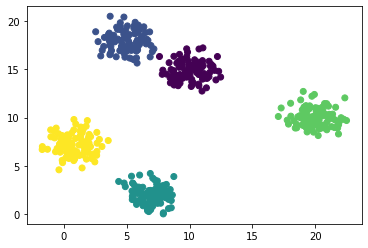

In [11]:
maxClasses = 5
points, classes = createPoints(numClasses=maxClasses, maxDist=20)
drawScatter(points, classes)

In [12]:
n = 100
print(points[n])
print(classes[n])

[ 5.47727346 16.07470972]
1


Определим данные популяции. 

Осбей - 100, выживает - 20.

In [23]:
popLen = 100 
nsurv = 20
nnew = popLen - nsurv
epohs = 3000


Создадим популяцию. случайным образом

In [24]:
popul = []
for i in range(popLen):
    bot = []
    for j in range(len(points)):
        bot.append(random.randint(0, maxClasses - 1))
    popul.append(bot)

Задаем коэфициент мутации и начинаем "жить"

In [25]:
mut = 0.01

Эпоха: 0
распознано классов: 5


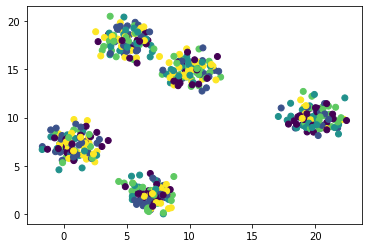

Эпоха: 200
распознано классов: 5


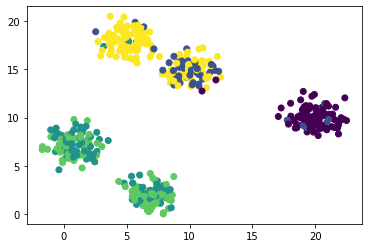

Эпоха: 400
распознано классов: 5


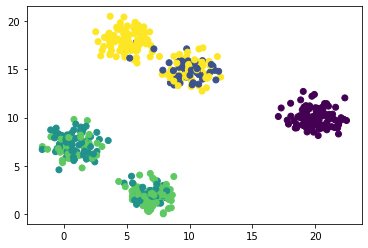

Эпоха: 600
распознано классов: 5


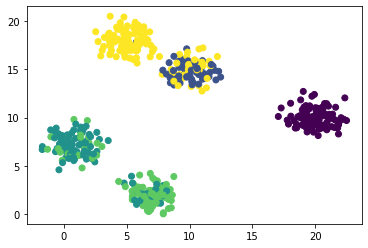

Эпоха: 800
распознано классов: 5


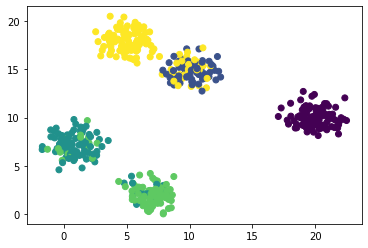

Эпоха: 1000
распознано классов: 5


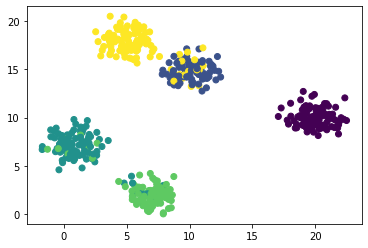

Эпоха: 1200
распознано классов: 5


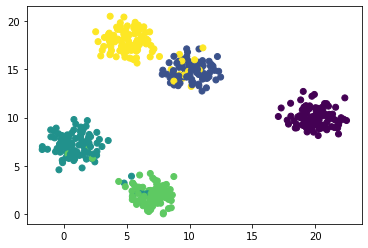

Эпоха: 1400
распознано классов: 5


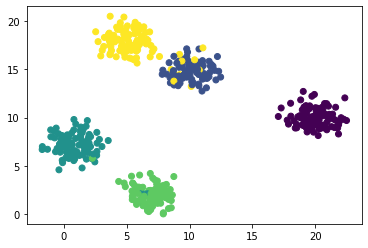

Эпоха: 1600
распознано классов: 5


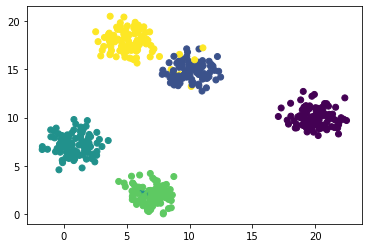

Эпоха: 1800
распознано классов: 5


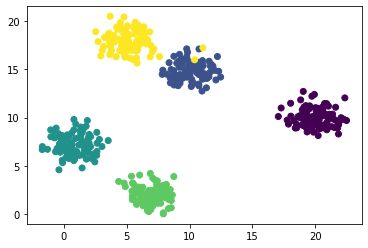

Эпоха: 2000
распознано классов: 5


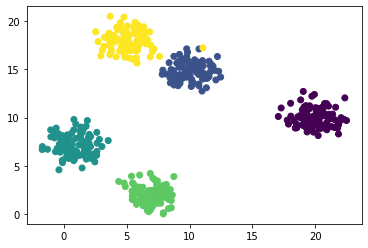

Эпоха: 2200
распознано классов: 5


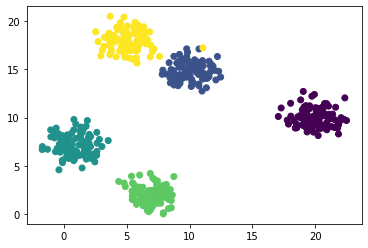

Эпоха: 2400
распознано классов: 5


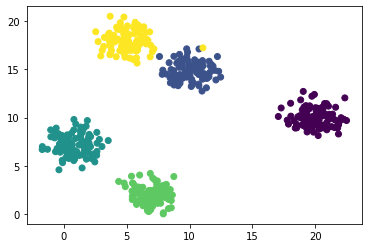

Эпоха: 2600
распознано классов: 5


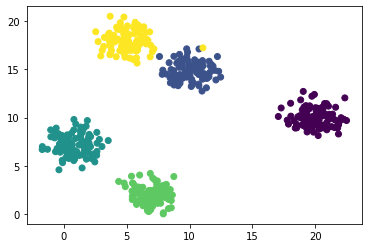

Эпоха: 2800
распознано классов: 5


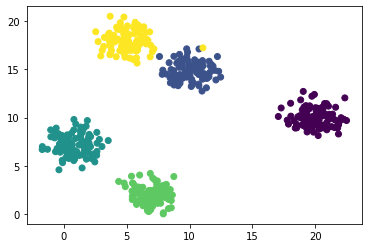

In [26]:
minErrCount = 0
minErr = 0

for ep in range(epohs):
    val = []
    for i in range(n):
        bot = popul[i]
        error = errFunc(bot, points)
        val.append(error)

    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
    #print(ep, [round(s, 5) for s in sval[:10]])

    for i in range(nnew):
        bot1, bot2 = getParents(newpopul, nsurv)
        newbot = []
        for j in range(len(bot1)):
            x = crossPointFrom2Parents(bot1, bot2, j)
            if random.random() < mut: 
              x = random.randint(0, maxClasses - 1)
            newbot.append(x)
        newpopul.append(newbot)
    
    popul = newpopul

    if not (ep % 200):
      print('Эпоха:', ep)
      print('распознано классов:', len(np.unique(predict)))
      predict = popul[0]
      drawScatter(points, predict)


    if ep == 1: minErr = sval[0]
    elif sval[0] < minErr:
      minErrCount = 0
      minErr = sval[0]
    else:
      minErrCount += 1
    

Кластризация генетическим алгоритмом - не лучший вариант кластерзации, однако пример наглядно показывает принципы работы
